In [0]:
spark

# Ejercicio 1: Análisis de los tiempos de los pilotos por en las Carreras

Objetivo: Analizar los tiempos de vuelta de los pilotos para identificar los mejores rendimientos en cada circuito.

##### 1. Carga los datos de tiempos por vueltas, circuitos, pilotos y carreras.

In [0]:
df_laps = spark.read.csv('dbfs:/FileStore/tables/lap_times.csv', header=True, inferSchema=True)
df_circuits = spark.read.csv('dbfs:/FileStore/tables/circuits.csv', header=True, inferSchema=True)
df_drivers = spark.read.csv('dbfs:/FileStore/tables/drivers.csv', header=True, inferSchema=True)
df_races = spark.read.csv('dbfs:/FileStore/tables/races.csv', header=True, inferSchema=True) 

 el archivo es grande y la conversión a un DataFrame de pandas consume demasiada memoria

##### 2. Explora los DataFrames para entender su estructura y los datos que contienen

In [0]:
df_laps_pd = df_laps.toPandas()
df_circuits_pd = df_circuits.toPandas()
df_drivers_pd = df_drivers.toPandas()
df_races_pd = df_races.toPandas()

In [0]:
df_laps_pd.info()
df_laps_pd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 589081 entries, 0 to 589080
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        589081 non-null  int32 
 1   driverId      589081 non-null  int32 
 2   lap           589081 non-null  int32 
 3   position      589081 non-null  int32 
 4   time          589081 non-null  object
 5   milliseconds  589081 non-null  int32 
dtypes: int32(5), object(1)
memory usage: 15.7+ MB


,raceId,driverId,lap,position,time,milliseconds
0,841,20,1,1,1:38.109,98109
1,841,20,2,1,1:33.006,93006
2,841,20,3,1,1:32.713,92713
3,841,20,4,1,1:32.803,92803
4,841,20,5,1,1:32.342,92342


In [0]:
df_laps_pd.isnull().sum()

raceId          0
driverId        0
lap             0
position        0
time            0
milliseconds    0
dtype: int64

In [0]:
df_circuits_pd.info()
df_circuits_pd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   circuitId   77 non-null     int32  
 1   circuitRef  77 non-null     object 
 2   name        77 non-null     object 
 3   location    77 non-null     object 
 4   country     77 non-null     object 
 5   lat         77 non-null     float64
 6   lng         77 non-null     float64
 7   alt         77 non-null     int32  
 8   url         77 non-null     object 
dtypes: float64(2), int32(2), object(5)
memory usage: 4.9+ KB


,circuitId,circuitRef,name,location,country,lat,lng,alt,url
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,2,sepang,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800,18,http://en.wikipedia.org/wiki/Sepang_Internatio...
2,3,bahrain,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060,7,http://en.wikipedia.org/wiki/Bahrain_Internati...
3,4,catalunya,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111,109,http://en.wikipedia.org/wiki/Circuit_de_Barcel...
4,5,istanbul,Istanbul Park,Istanbul,Turkey,40.95170,29.40500,130,http://en.wikipedia.org/wiki/Istanbul_Park


In [0]:
df_circuits_pd.isnull().sum()

circuitId     0
circuitRef    0
name          0
location      0
country       0
lat           0
lng           0
alt           0
url           0
dtype: int64

In [0]:
df_drivers_pd.info()
df_drivers_pd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 861 entries, 0 to 860
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     861 non-null    int32 
 1   driverRef    861 non-null    object
 2   number       861 non-null    object
 3   code         861 non-null    object
 4   forename     861 non-null    object
 5   surname      861 non-null    object
 6   dob          861 non-null    object
 7   nationality  861 non-null    object
 8   url          861 non-null    object
dtypes: int32(1), object(8)
memory usage: 57.3+ KB


,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [0]:
df_drivers_pd.isnull().sum()

driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

In [0]:
df_races_pd.info()
df_races_pd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   raceId       1125 non-null   int32 
 1   year         1125 non-null   int32 
 2   round        1125 non-null   int32 
 3   circuitId    1125 non-null   int32 
 4   name         1125 non-null   object
 5   date         1125 non-null   object
 6   time         1125 non-null   object
 7   url          1125 non-null   object
 8   fp1_date     1125 non-null   object
 9   fp1_time     1125 non-null   object
 10  fp2_date     1125 non-null   object
 11  fp2_time     1125 non-null   object
 12  fp3_date     1125 non-null   object
 13  fp3_time     1125 non-null   object
 14  quali_date   1125 non-null   object
 15  quali_time   1125 non-null   object
 16  sprint_date  1125 non-null   object
 17  sprint_time  1125 non-null   object
dtypes: int32(4), object(14)
memory usage: 140.8+ KB


,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


In [0]:
df_races_pd.isnull().sum()

raceId         0
year           0
round          0
circuitId      0
name           0
date           0
time           0
url            0
fp1_date       0
fp1_time       0
fp2_date       0
fp2_time       0
fp3_date       0
fp3_time       0
quali_date     0
quali_time     0
sprint_date    0
sprint_time    0
dtype: int64

##### 3. Prepara los datos. Antes de analizar los tiempos de vuelta, necesitarás unir los tiempos por vuelta con circuitos y pilotos.

In [0]:
df_fix = df_laps.join(df_races, on="raceId", how="inner")

df_fix = df_fix.join(df_drivers, on="driverId", how="inner")

df_fix = df_fix.join(df_circuits, on="circuitId", how="inner")

df_fix_pd = df_fix.toPandas()

In [0]:
df_fix_pd.head()

,circuitId,driverId,raceId,lap,position,time,milliseconds,year,round,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,driverRef,number,code,forename,surname,dob,nationality,url,circuitRef,name,location,country,lat,lng,alt,url
0,1,20,841,1,1,1:38.109,98109,2011,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,1,20,841,2,1,1:33.006,93006,2011,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,1,20,841,3,1,1:32.713,92713,2011,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,1,20,841,4,1,1:32.803,92803,2011,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,1,20,841,5,1,1:32.342,92342,2011,1,Australian Grand Prix,2011-03-27,06:00:00,http://en.wikipedia.org/wiki/2011_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,vettel,5,VET,Sebastian,Vettel,1987-07-03,German,http://en.wikipedia.org/wiki/Sebastian_Vettel,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


In [0]:
import pandas as pd
#pd.set_option('display.max_rows', None)  # Muestra todas las filas
#pd.set_option('display.max_columns', None)  # Muestra todas las columnas
#pd.set_option('display.width', None)  # Ajusta el ancho de la pantalla
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
pd.reset_option('display.width')

##### 4. Identifica el piloto con la vuelta más rápida en cada circuito.

In [0]:
fastest_laps = df_fix_pd.loc[df_fix_pd.groupby('circuitId')['milliseconds'].idxmin(), ['surname', 'name', 'time']]

fastest_laps = fastest_laps.sort_values(by='surname')
print(fastest_laps)

              surname                       name  ...      time      time
260720    Barrichello         Italian Grand Prix  ...  1:21.046        \N
254468    Barrichello   United States Grand Prix  ...  1:10.399        \N
130730         Berger       Argentine Grand Prix  ...  1:27.981        \N
446758         Bottas       Brazilian Grand Prix  ...  1:10.540  17:10:00
510280         Bottas     Mexico City Grand Prix  ...  1:17.774  19:00:00
456239         Bottas        Canadian Grand Prix  ...  1:13.078  18:10:00
223208      Coulthard          French Grand Prix  ...  1:15.045        \N
268741     Fisichella         Spanish Grand Prix  ...  1:15.641  14:00:00
144242       Frentzen        European Grand Prix  ...  1:23.135        \N
353902          Glock        European Grand Prix  ...  1:38.683  12:00:00
485285       Hamilton  Emilia Romagna Grand Prix  ...  1:15.484  12:10:00
503699       Hamilton           Dutch Grand Prix  ...  1:11.097  13:00:00
465891       Hamilton         Russian 

##### 5. Identificar Mejores Rendimientos de cada circuito (Mejores medias de tiempos por vuelta)

In [0]:
average_lap_times = df_fix_pd.groupby(['circuitId', 'driverId'])['milliseconds'].mean().reset_index()

best_performance = average_lap_times.loc[average_lap_times.groupby('circuitId')['milliseconds'].idxmin()]
# Unir con df_fix_pd para obtener el nombre del piloto
best_performance = best_performance.merge(df_fix_pd[['driverId', 'surname', 'name']].drop_duplicates(), on='driverId', how='left')
best_performance = best_performance.sort_values(by='circuitId')

print(best_performance[['circuitId', 'surname', 'name', 'milliseconds']])

     circuitId    surname  ...                                  name   milliseconds
0            1    Leclerc  ...        Albert Park Grand Prix Circuit   89354.974138
20           1    Leclerc  ...          Circuit de Spa-Francorchamps   89354.974138
21           1    Leclerc  ...                         Red Bull Ring   89354.974138
22           1    Leclerc  ...                   Silverstone Circuit   89354.974138
23           1    Leclerc  ...  Autodromo Internazionale del Mugello   89354.974138
..         ...        ...  ...                                   ...            ...
971         80  Colapinto  ...             Marina Bay Street Circuit  100022.820000
972         80  Colapinto  ...               Circuit of the Americas  100022.820000
973         80  Colapinto  ...          Autódromo Hermanos Rodríguez  100022.820000
974         80  Colapinto  ...            Autódromo José Carlos Pace  100022.820000
976         80  Colapinto  ...                    Yas Marina Circuit  100022

# Ejercicio 2: Análisis del Impacto de las Paradas en Boxes en los Resultados de las Carreras

Objetivo: Investigar cómo las paradas en boxes afectan el rendimiento de los pilotos en las carreras y determinar si ciertas estrategias de paradas en boxes están correlacionadas con mejores resultados.

##### 1. Carga los datos de tiempos de pit stop y resultados.

In [0]:
df_pit_stop = spark.read.csv('dbfs:/FileStore/tables/pit_stops.csv', header=True, inferSchema=True)
df_results = spark.read.csv('dbfs:/FileStore/tables/results.csv', header=True, inferSchema=True)

In [0]:
df_pit_stop_pd = df_pit_stop.toPandas()
df_results_pd = df_result.toPandas()

##### 2. Explora los DataFrames para entender su estructura y los datos que contienen

In [0]:
df_pit_stop_pd.info()
df_pit_stop_pd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11371 entries, 0 to 11370
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   raceId        11371 non-null  int32         
 1   driverId      11371 non-null  int32         
 2   stop          11371 non-null  int32         
 3   lap           11371 non-null  int32         
 4   time          11371 non-null  datetime64[ns]
 5   duration      11371 non-null  object        
 6   milliseconds  11371 non-null  int32         
dtypes: datetime64[ns](1), int32(5), object(1)
memory usage: 399.9+ KB


,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,2025-02-24 17:05:23,26.898,26898
1,841,30,1,1,2025-02-24 17:05:52,25.021,25021
2,841,17,1,11,2025-02-24 17:20:48,23.426,23426
3,841,4,1,12,2025-02-24 17:22:34,23.251,23251
4,841,13,1,13,2025-02-24 17:24:10,23.842,23842


In [0]:
df_results_pd.info()
df_results_pd.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         26759 non-null  int32  
 1   raceId           26759 non-null  int32  
 2   driverId         26759 non-null  int32  
 3   constructorId    26759 non-null  int32  
 4   number           26759 non-null  object 
 5   grid             26759 non-null  int32  
 6   position         26759 non-null  object 
 7   positionText     26759 non-null  object 
 8   positionOrder    26759 non-null  int32  
 9   points           26759 non-null  float64
 10  laps             26759 non-null  int32  
 11  time             26759 non-null  object 
 12  milliseconds     26759 non-null  object 
 13  fastestLap       26759 non-null  object 
 14  rank             26759 non-null  object 
 15  fastestLapTime   26759 non-null  object 
 16  fastestLapSpeed  26759 non-null  object 
 17  statusId    

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


##### 3. Prepara los datos. Deberías unir los resultados con los pit_stop.

In [0]:
df_fix_stop_result = df_pit_stop.join(df_result, on="raceId", how="inner")

df_fix_stop_result_pd = df_fix_stop_result.toPandas()

In [0]:
df_fix_stop_result_pd.head()

,raceId,driverId,stop,lap,time,duration,milliseconds,resultId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,841,13,3,48,2025-02-24 18:18:54,24.095,24095,20779,20,9,1,1,1,1,1,25.0,58,1:29:30.259,5370259,44,4,1:29.844,212.488,1
1,841,4,3,42,2025-02-24 18:09:08,24.181,24181,20779,20,9,1,1,1,1,1,25.0,58,1:29:30.259,5370259,44,4,1:29.844,212.488,1
2,841,22,4,40,2025-02-24 18:08:03,26.309,26309,20779,20,9,1,1,1,1,1,25.0,58,1:29:30.259,5370259,44,4,1:29.844,212.488,1
3,841,17,3,41,2025-02-24 18:07:37,26.230,26230,20779,20,9,1,1,1,1,1,25.0,58,1:29:30.259,5370259,44,4,1:29.844,212.488,1
4,841,816,2,38,2025-02-24 18:06:53,26.446,26446,20779,20,9,1,1,1,1,1,25.0,58,1:29:30.259,5370259,44,4,1:29.844,212.488,1


##### 4. Calcular el impacto de los pit stops: Necesitamos obtener datos clave para evaluar el impacto de los pit stops en el rendimiento, como el tiempo total en pit stops por carrera y el número de paradas, y compáralo con la posición final en la carrera

In [0]:
df_pit_summary = df_pit_stop.groupBy("raceId", "driverId") \
    .agg(
        F.sum("milliseconds").alias("total_pit_time"),
        F.count("stop").alias("num_pit_stops")
    )

# Obtener posición final de los pilotos en cada carrera
df_final_positions = df_results.select("raceId", "driverId", "positionOrder")

df_analysis = df_pit_summary.join(df_final_positions, ["raceId", "driverId"])
df_analysis.orderBy("positionOrder").show()

+------+--------+--------------+-------------+-------------+
|raceId|driverId|total_pit_time|num_pit_stops|positionOrder|
+------+--------+--------------+-------------+-------------+
|   897|      20|         43573|            2|            1|
|   912|       1|         24453|            1|            1|
|   931|       3|         24789|            1|            1|
|   891|      20|         45569|            2|            1|
|   862|       3|         41758|            2|            1|
|  1141|     830|       1409303|            1|            1|
|   937|       1|         45358|            2|            1|
|   887|       3|         75319|            3|            1|
|  1087|     830|         45204|            2|            1|
|   914|       1|       1184863|            3|            1|
|  1019|       1|         28905|            1|            1|
|   952|     830|         44717|            2|            1|
|   875|      20|         39631|            2|            1|
|   874|      20|       

##### 5. Identificación de patrones o estrategias que pueden ser exitosas. De los datos que has obtenido, que posibles conclusiones o estrategias obtienes? Hay alguna correlación? Podrías ampliarlas o mejorarlas usando más datos? Cuáles y cómo los obtendrías?

1. Pocas paradas vs. muchas paradas

- Si los pilotos con menos paradas en boxes tienen mejores posiciones finales, podría indicar que evitar paradas es clave para un buen rendimiento.
- Sin embargo, si los pilotos con más paradas terminan en buenas posiciones, puede indicar que paradas estratégicas con neumáticos nuevos ofrecen ventaja.

2. Impacto del tiempo total en pits

- Pilotos que pasan menos tiempo en los pits suelen obtener mejores resultados.
- Un tiempo prolongado en pits puede ser perjudicial, pero en ciertas carreras (ej. lluvia, accidentes) podría ser necesario.

3. Número óptimo de paradas

- Si hay un patrón de cantidad de paradas en los pilotos que terminan en el podio (1, 2 o 3 paradas), podríamos inferir la mejor estrategia.
- Esto depende de factores como la duración de la carrera y el desgaste de los neumáticos.

In [0]:
correlation_pitstops = df_analysis.stat.corr("num_pit_stops", "positionOrder")
correlation_pit_time = df_analysis.stat.corr("total_pit_time", "positionOrder")

print(f"Correlación entre número de paradas y posición final: {correlation_pitstops}")
print(f"Correlación entre tiempo total en pits y posición final: {correlation_pit_time}")

Correlación entre número de paradas y posición final: 0.039347079718276654
Correlación entre tiempo total en pits y posición final: -0.04888789338008715


Si la correlación es positiva, significa que más paradas o más tiempo en pits están relacionados con peores posiciones finales.

Si la correlación es negativa, sugiere que más paradas pueden mejorar la posición final.

Quizás podriamos mejorar si tuviesemos más datos. Posiblemente tipos de datos como el clima o los neumaticos. Los neumaticos se podrían recoger mediante una inspección a cada una de las casas competidoras para obtener esa información. El clima con distintos medidores, dependiendo que de queremos recoger para saber que puede llegar a afectar más a la carrera, si la lluvia, la temperatura, la humedad, etc.

# Ejercicio 3: Business Intelligence. Analizar el impacto de los tipos de circuito y la posición histórica de los pilotos en cada circuito

Objetivo: Descubrir patrones y tendencias que puedan predecir el rendimiento de pilotos y equipos, lo cual es crucial para la planificación estratégica y la toma de decisiones.

##### 1. Preparación de Datos. Carga los datos de circuitos, resultados, tiempos por vuelta y pilotos.

In [0]:
df_circuits = spark.read.csv('dbfs:/FileStore/tables/circuits.csv', header=True, inferSchema=True)
df_results = spark.read.csv('dbfs:/FileStore/tables/results.csv', header=True, inferSchema=True)
df_laps = spark.read.csv('dbfs:/FileStore/tables/lap_times.csv', header=True, inferSchema=True)
df_drivers = spark.read.csv('dbfs:/FileStore/tables/drivers.csv', header=True, inferSchema=True)

##### 2. Relacionar las carreras con los circuitos

In [0]:
df_results.printSchema()
df_circuits.printSchema()

root
 |-- resultId: integer (nullable = true)
 |-- raceId: integer (nullable = true)
 |-- driverId: integer (nullable = true)
 |-- constructorId: integer (nullable = true)
 |-- number: string (nullable = true)
 |-- grid: integer (nullable = true)
 |-- position: string (nullable = true)
 |-- positionText: string (nullable = true)
 |-- positionOrder: integer (nullable = true)
 |-- points: double (nullable = true)
 |-- laps: integer (nullable = true)
 |-- time: string (nullable = true)
 |-- milliseconds: string (nullable = true)
 |-- fastestLap: string (nullable = true)
 |-- rank: string (nullable = true)
 |-- fastestLapTime: string (nullable = true)
 |-- fastestLapSpeed: string (nullable = true)
 |-- statusId: integer (nullable = true)

root
 |-- circuitId: integer (nullable = true)
 |-- circuitRef: string (nullable = true)
 |-- name: string (nullable = true)
 |-- location: string (nullable = true)
 |-- country: string (nullable = true)
 |-- lat: double (nullable = true)
 |-- lng: double

In [0]:
# Primero unimos carreras con circuitos
df_races_circuits = df_races.join(df_circuits, on="circuitId", how="inner")

# Luego unimos el resultado con los resultados de las carreras
df_fix_race = df_results.join(df_races_circuits.select("raceId", "circuitId"), on="raceId", how="inner")

# Convertimos a Pandas para inspeccionar
df_fix_race_pd = df_fix_race.toPandas()
df_fix_race_pd.head()

,raceId,resultId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,circuitId
0,18,1,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,1
1,18,2,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,1
2,18,3,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,1
3,18,4,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,1
4,18,5,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,1


##### 3. Cálculo de posiciones históricas por circuitos de cada piloto. Podríamos predecir cual podría ser su rendimiento actual que nos influye en la estrategia.

In [0]:
df_race_circuit = df_races.join(df_circuits, on="circuitId", how="inner")
df_race_result = df_results.join(df_race_circuit.select("raceId", "circuitId"), on="raceId", how="inner")
df_driver_race = df_race_result.join(df_drivers.select("driverId", "surname"), on="driverId", how="inner")


historical_positions = (
    df_driver_race
    .groupBy("driverId", "surname")
    .agg(
        F.count("position").alias("races_count"),
        F.avg("position").alias("avg_position"),
        F.min("position").alias("best_position"),
        F.count(F.when(F.col("position") <= 3, True)).alias("podiums")
    )
    .orderBy("surname", "avg_position")
)


historical_positions_pd = historical_positions.toPandas()
historical_positions_pd.head()

,driverId,surname,races_count,avg_position,best_position,podiums
0,446,Abate,2,NaN,\N,0
1,725,Abecassis,2,NaN,\N,0
2,186,Acheson,9,12.0,12,0
3,113,Adams,2,16.0,16,0
4,796,Ader,1,22.0,22,0


##### 4. Cálculo de tiempos medios de cada piloto por circuitos. Podríamos predecir cual podría ser su rendimiento actual que nos influye en la estrategia.

In [0]:
df_race_circuit = df_races.join(df_circuits, on="circuitId", how="inner")
df_lap_race = df_laps.join(df_race_circuit.select("raceId", "circuitId"), on="raceId", how="inner")
df_lap_driver = df_lap_race.join(df_drivers.select("driverId", "surname"), on="driverId", how="inner")

avg_lap_times = (
    df_lap_driver
    .groupBy("driverId", "surname")
    .agg(
        F.count("milliseconds").alias("laps_count"),
        F.avg("milliseconds").alias("avg_lap_time"),
        F.min("milliseconds").alias("best_lap_time")
    )
    .orderBy("surname", "avg_lap_time")
)

avg_lap_times_pd = avg_lap_times.toPandas()
avg_lap_times_pd.head()

,driverId,surname,laps_count,avg_lap_time,best_lap_time
0,851,Aitken,87,63319.402299,57392
1,27,Albers,2194,91653.005469,73907
2,848,Albon,5627,94918.974409,57056
3,55,Alesi,4870,92439.636345,72953
4,153,Alguersuari,2361,103473.191021,74861


##### 5. Para un mejor análisis, crea un dataframe que incluya los 2 puntos anteriores

In [0]:
df_combined = avg_lap_times.join(historical_positions, on=["driverId", "surname"], how="inner")

df_combined_pd = df_combined.toPandas()
df_combined_pd.head()

,driverId,surname,laps_count,avg_lap_time,best_lap_time,races_count,avg_position,best_position,podiums
0,55,Alesi,4870,92439.636345,72953,202,6.210084,1,32
1,838,Vandoorne,2207,96398.246942,68422,42,12.088235,10,0
2,81,Morbidelli,355,89921.912676,72826,70,10.294118,10,1
3,833,Merhi,737,100870.104478,74939,13,15.500000,12,0
4,84,Brundle,705,95444.026950,80414,165,7.192771,10,9


##### 6. Realiza una predicción de la posición del piloto en cada circuito de la temporada actual teniendo en cuenta la media histórica de tiempos, de posición y la experiencia del piloto

Primero vamos a combinar nuestro dataframe con la columna restante del dataframe de results, cogeremos como experiencia del piloto el número de carreras completadas.

In [0]:
df_experience = (
    df_results
    .groupBy("driverId")
    .agg(F.count("raceId").alias("experience"))
)

df_experience = df_experience.select("driverId", "experience")

# Combinar tiempos medios, posiciones históricas y experiencia en un solo DataFrame
df_combined = (
    df_combined
    .join(df_experience, on="driverId", how="left")
)

# Convertir a Pandas para el modelo de Machine Learning
df_combined_pd = df_combined.toPandas()

df_combined_pd.head()

,driverId,surname,laps_count,avg_lap_time,best_lap_time,races_count,avg_position,best_position,podiums,experience
0,55,Alesi,4870,92439.636345,72953,202,6.210084,1,32,202
1,838,Vandoorne,2207,96398.246942,68422,42,12.088235,10,0,42
2,81,Morbidelli,355,89921.912676,72826,70,10.294118,10,1,70
3,833,Merhi,737,100870.104478,74939,13,15.500000,12,0,13
4,84,Brundle,705,95444.026950,80414,165,7.192771,10,9,165


Hacemos una limpieza de los datos porque tenemos 3 datos nulos de best_position, seguramente porque por el tiempo de vuelta la posición sea nula. Voy a usar el valor más bajo para estos 3, que sería lo que correspondería con ellos.

In [0]:
df_combined_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143 entries, 0 to 142
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   driverId       143 non-null    int32  
 1   surname        143 non-null    object 
 2   laps_count     143 non-null    int64  
 3   avg_lap_time   143 non-null    float64
 4   best_lap_time  143 non-null    int32  
 5   races_count    143 non-null    int64  
 6   avg_position   140 non-null    float64
 7   best_position  143 non-null    object 
 8   podiums        143 non-null    int64  
 9   experience     143 non-null    int64  
dtypes: float64(2), int32(2), int64(4), object(2)
memory usage: 10.2+ KB


In [0]:
df_combined_pd.isnull().sum()

driverId         0
surname          0
laps_count       0
avg_lap_time     0
best_lap_time    0
races_count      0
avg_position     3
best_position    0
podiums          0
experience       0
dtype: int64

In [0]:
df_combined_pd.replace('\\N', np.nan, inplace=True)

#min_value = df_combined_pd["best_position"].min()
min_value = 22
df_combined_pd.fillna(value=min_value, inplace=True)

A continuación creamos un modelo de regresión lineal el cual es el más conveniente para este caso

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Seleccionar características y variable objetivo
X = df_combined_pd[['avg_lap_time', 'avg_position', 'experience']]
y = df_combined_pd['best_position']

# Normalizar las características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones y evaluación del modelo
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")

RMSE: 2.404963568887449
MAE: 1.9131820558829618


visualizamos nuestro dataframe de predicciones

In [0]:
# Predicciones para la temporada actual
df_season = df_combined_pd
X_season = scaler.transform(df_season[['avg_lap_time', 'avg_position', 'experience']])
predictions = model.predict(X_season)
df_season['predicted_position'] = predictions.round()

df_season[['surname', 'predicted_position']]

,surname,predicted_position
0,Alesi,2.0
1,Vandoorne,10.0
2,Morbidelli,8.0
3,Merhi,13.0
4,Brundle,4.0
...,...,...
138,Sargeant,13.0
139,Fittipaldi,15.0
140,Doohan,13.0
141,Bearman,9.0


##### 7. Visualiza los datos.

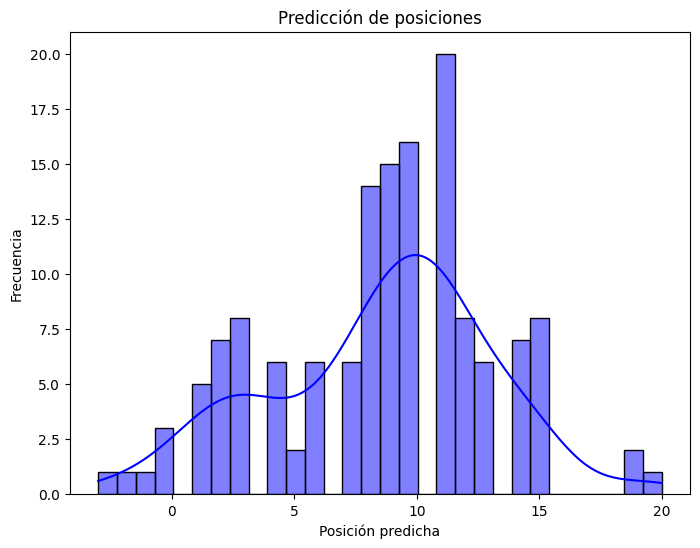

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(8, 6))
sns.histplot(df_season['predicted_position'], kde=True, bins=30, color='blue')
plt.title('Predicción de posiciones')
plt.xlabel('Posición predicha')
plt.ylabel('Frecuencia')
plt.show()

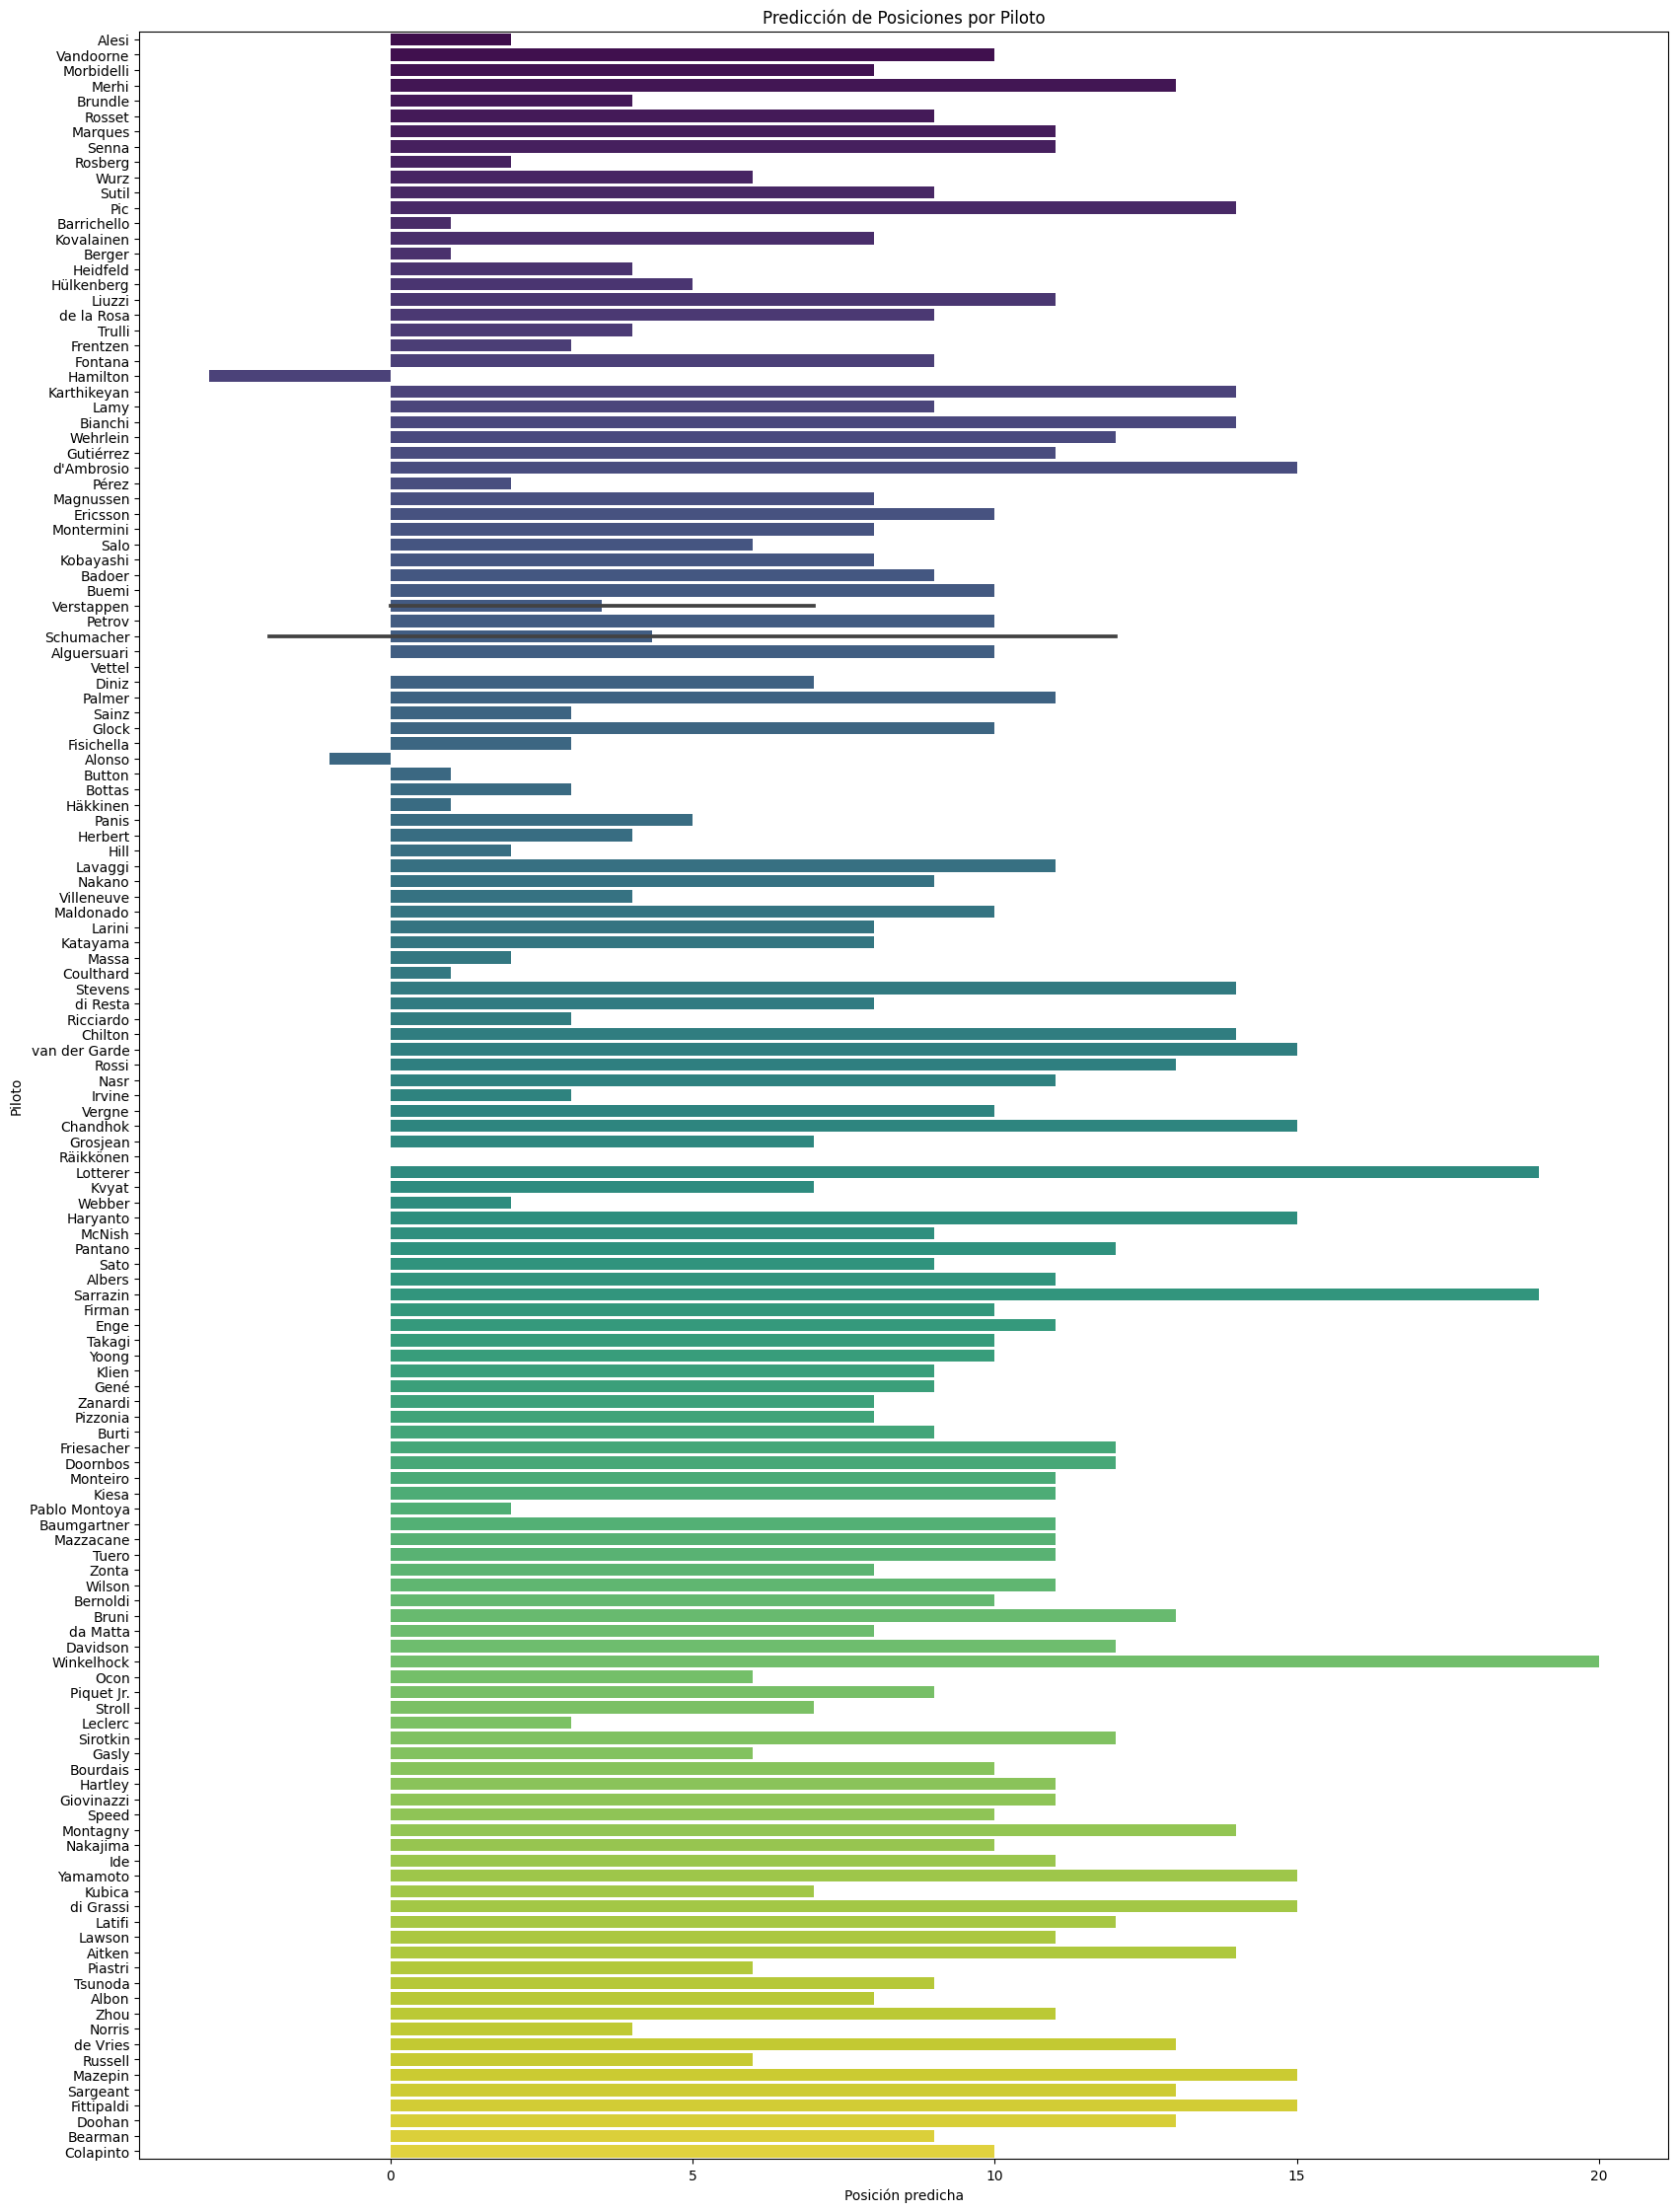

In [0]:
plt.figure(figsize=(20, 28))
sns.barplot(x='predicted_position', y='surname', data=df_season, palette='viridis')
plt.title('Predicción de Posiciones por Piloto')
plt.xlabel('Posición predicha')
plt.ylabel('Piloto')
plt.show()